In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model Training

In [3]:
df = pd.read_csv('data/Cleaned_HR_data.csv')
df.head(1)

,DailyRate,BusinessTravel_encoded,EducationField_encoded,Gender_encoded,Department_encoded,JobRole_encoded,MaritalStatus_encoded,Rate_to_income,Income_per_hour,Working_years_per_company,...,Distance_JobSatisfaction,WorkLife_Satisfaction,YearsInRole_ManagerRatio,JobLevel_Education,JobStability_Score,Engagement_Score,PerformanceToReward,SkillInvestment_Score,Stress_score,Attrition_encoded
0,279,1,1,1,1,6,1,4.855166,2.803279,10.0,...,2.666667,3.5,0.875,2,0.2,2.5,0.166667,3,0,0


In [ ]:
df['Attrition_encoded'].unique()
# yes is 1 and no is 0

array([0, 1])

In [5]:
df.corr()

,DailyRate,BusinessTravel_encoded,EducationField_encoded,Gender_encoded,Department_encoded,JobRole_encoded,MaritalStatus_encoded,Rate_to_income,Income_per_hour,Working_years_per_company,...,Distance_JobSatisfaction,WorkLife_Satisfaction,YearsInRole_ManagerRatio,JobLevel_Education,JobStability_Score,Engagement_Score,PerformanceToReward,SkillInvestment_Score,Stress_score,Attrition_encoded
DailyRate,1.000000,0.023100,0.067353,0.092394,NaN,-0.031472,-0.041089,-0.030631,-0.069658,-0.026675,...,-0.072429,0.022318,-0.013116,-0.025743,0.010412,0.130221,-0.038955,0.073098,NaN,0.005610
BusinessTravel_encoded,0.023100,1.000000,0.008332,-0.025806,NaN,-0.016183,0.043625,-0.019242,0.002610,-0.030045,...,-0.044952,0.014218,-0.027262,0.018360,-0.019153,0.041315,0.007648,-0.003691,NaN,-0.126056
EducationField_encoded,0.067353,0.008332,1.000000,0.086468,NaN,0.073180,0.044222,-0.048463,-0.045955,-0.028816,...,-0.039330,-0.014599,0.076723,-0.060364,0.075181,0.125548,-0.003015,0.007520,NaN,-0.002768
Gender_encoded,0.092394,-0.025806,0.086468,1.000000,NaN,-0.060273,-0.022872,-0.132860,-0.041499,0.021815,...,-0.020206,-0.034562,-0.011102,0.041442,-0.005911,0.036335,0.007731,0.063338,NaN,-0.106468
Department_encoded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JobRole_encoded,-0.031472,-0.016183,0.073180,-0.060273,NaN,1.000000,0.134717,0.074533,-0.116161,-0.034377,...,-0.006521,-0.033661,-0.027572,-0.128014,-0.044281,-0.009099,-0.079328,-0.089840,NaN,0.137963
MaritalStatus_encoded,-0.041089,0.043625,0.044222,-0.022872,NaN,0.134717,1.000000,0.015013,-0.068305,-0.037905,...,0.002350,0.022858,0.010733,-0.087479,-0.012722,-0.043730,0.014354,-0.516486,NaN,0.131196
Rate_to_income,-0.030631,-0.019242,-0.048463,-0.132860,NaN,0.074533,0.015013,1.000000,-0.426852,-0.175593,...,0.007477,-0.075052,-0.134286,-0.378082,-0.164413,-0.019570,-0.031342,-0.062483,NaN,0.079027
Income_per_hour,-0.069658,0.002610,-0.045955,-0.041499,NaN,-0.116161,-0.068305,-0.426852,1.000000,0.269367,...,0.072317,0.013800,0.162837,0.577187,0.262940,-0.010370,-0.078946,0.038769,NaN,-0.056348
Working_years_per_company,-0.026675,-0.030045,-0.028816,0.021815,NaN,-0.034377,-0.037905,-0.175593,0.269367,1.000000,...,-0.033491,0.013888,0.368926,0.235720,0.714188,0.054956,0.075044,0.034328,NaN,-0.168758


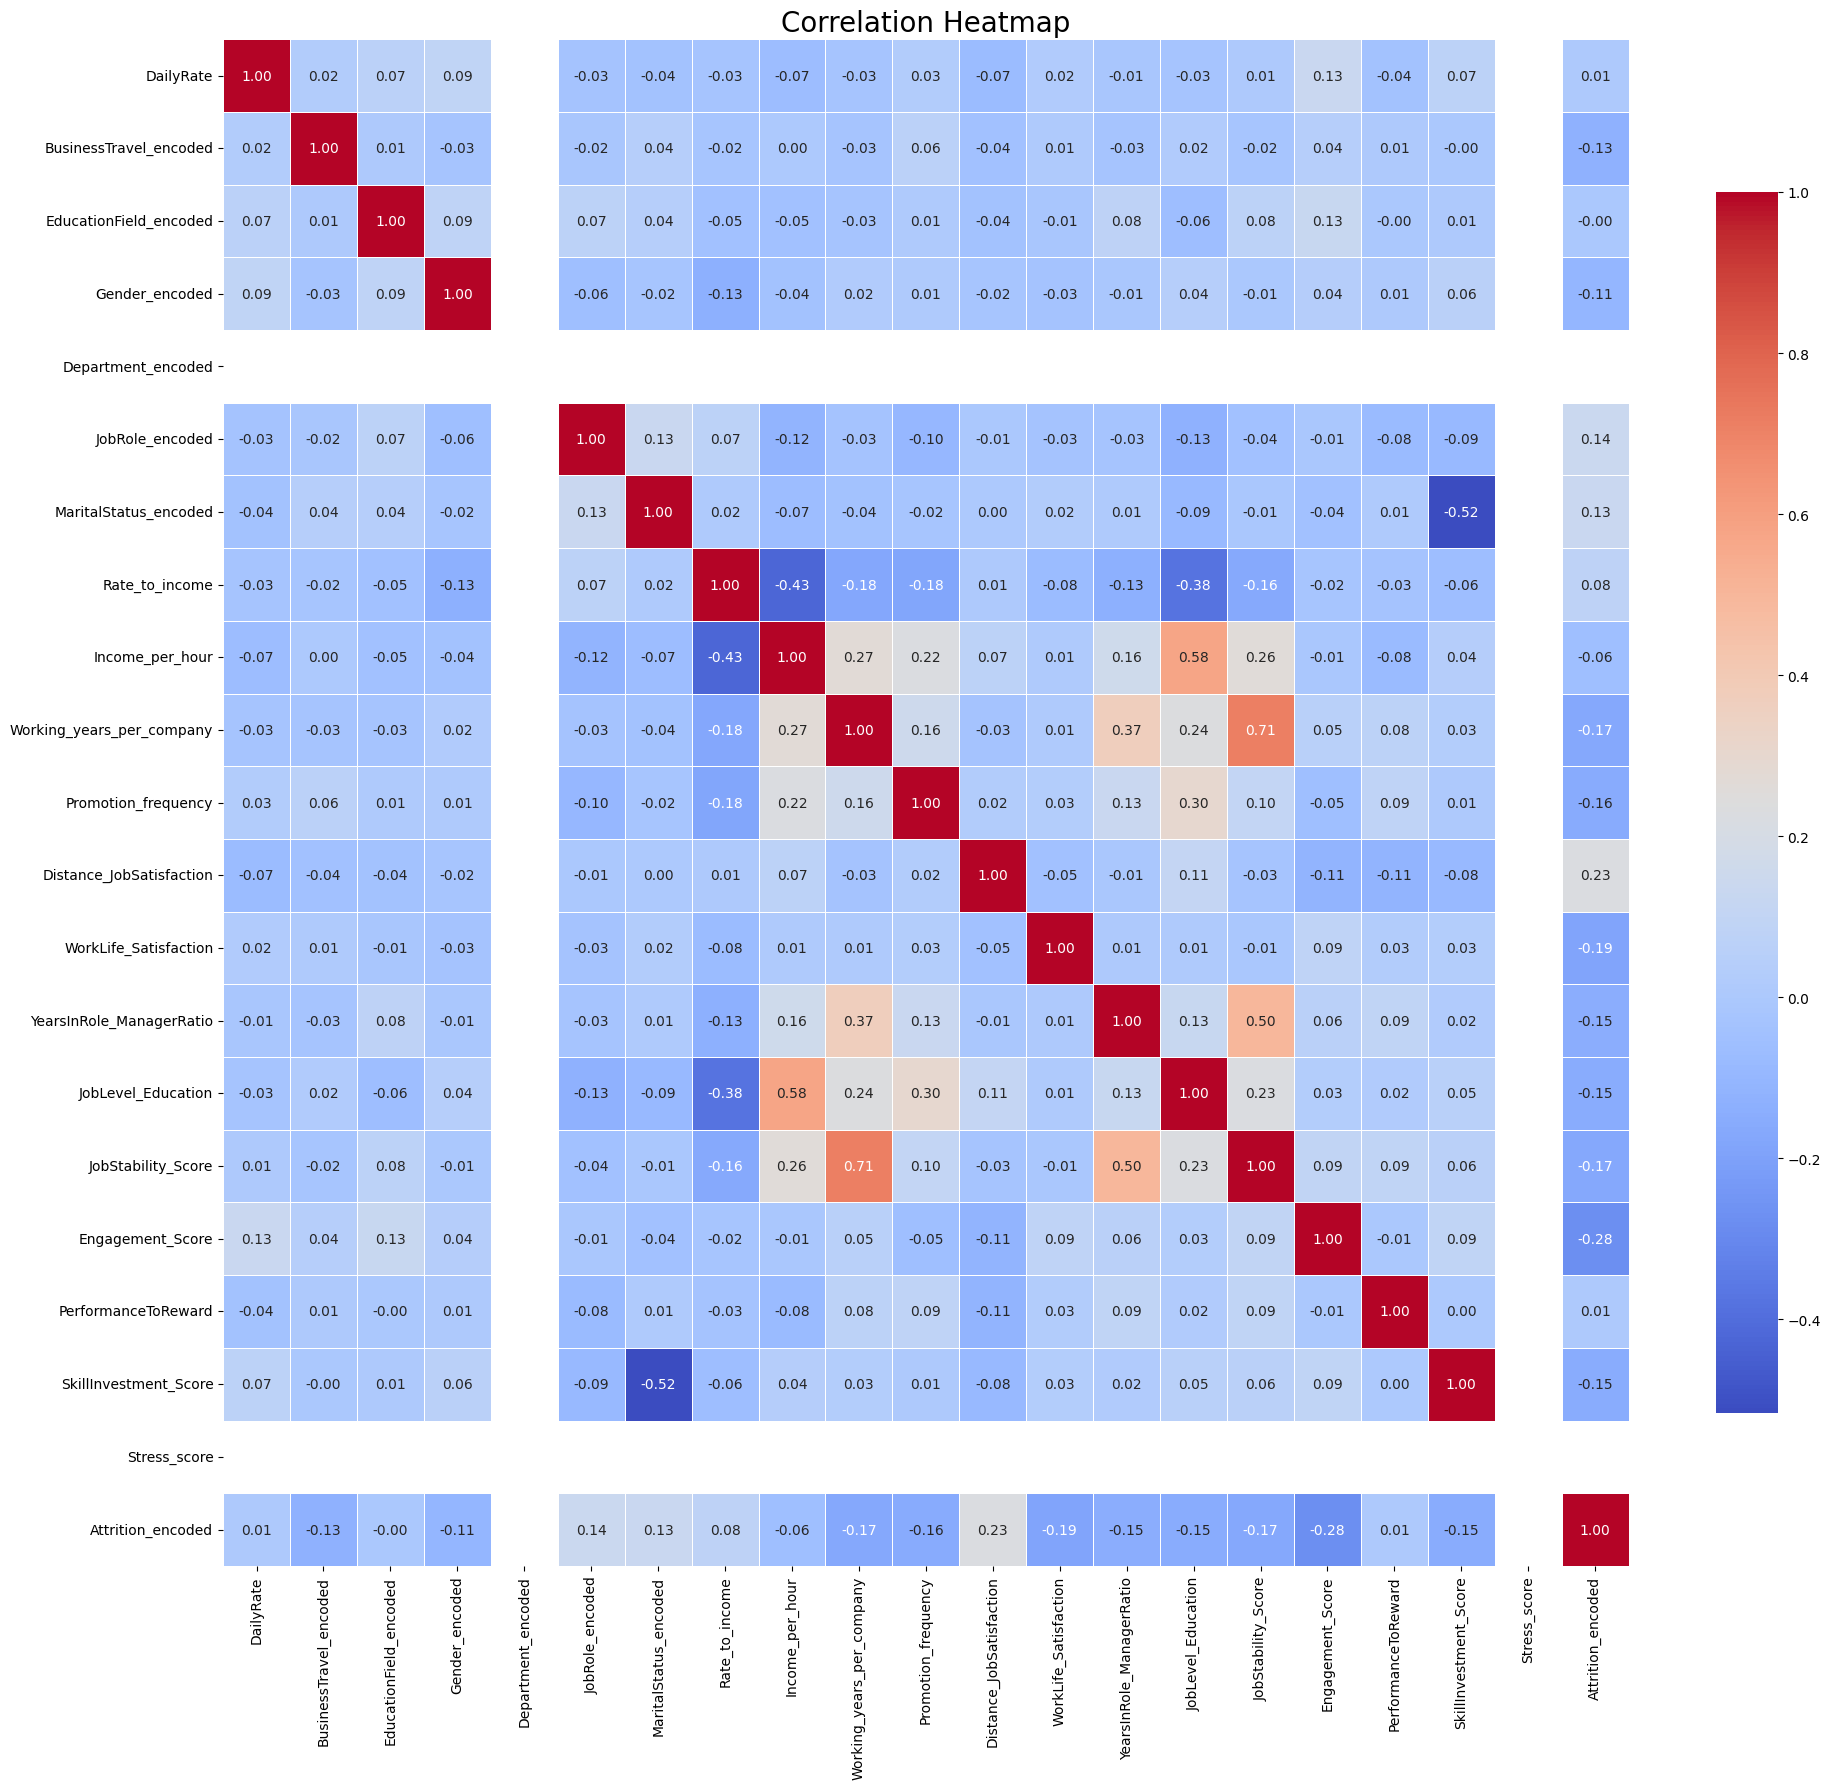

In [8]:
plt.figure(figsize=(20, 18))
# Create the heatmap
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, cbar_kws={'shrink': 0.8})
# Add title and labels
plt.title('Correlation Heatmap', fontsize=20)
plt.tight_layout()
# Display the plot
plt.show()

In [9]:
# Seperating the Independent and dependent features
X = df.drop('Attrition_encoded',axis=1)
y = df['Attrition_encoded']

In [10]:
X.head()

,DailyRate,BusinessTravel_encoded,EducationField_encoded,Gender_encoded,Department_encoded,JobRole_encoded,MaritalStatus_encoded,Rate_to_income,Income_per_hour,Working_years_per_company,Promotion_frequency,Distance_JobSatisfaction,WorkLife_Satisfaction,YearsInRole_ManagerRatio,JobLevel_Education,JobStability_Score,Engagement_Score,PerformanceToReward,SkillInvestment_Score,Stress_score
0,279,1,1,1,1,6,1,4.855166,2.803279,10.000000,5.0,2.666667,3.5,0.875000,2,0.200000,2.5,0.166667,3,0
1,1373,2,4,1,1,2,2,1.146411,0.757246,1.166667,7.0,0.500000,2.5,0.000000,2,0.000000,3.0,0.187500,0,0
2,1392,1,1,0,1,6,1,7.961155,1.731548,8.000000,2.0,0.750000,3.0,0.000000,4,0.235294,3.5,0.250000,0,0
3,591,2,3,1,1,2,1,4.795848,2.890000,0.666667,2.0,0.666667,3.5,0.666667,1,0.071429,2.0,0.230769,3,0
4,1005,1,1,1,1,2,2,3.867014,1.294515,8.000000,2.0,0.400000,2.5,0.750000,2,0.212121,3.5,0.214286,0,0


In [12]:
# Train test split the dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [94]:
X_train.shape,X_test.shape , y_train.shape,y_test.shape

((576, 20), (241, 20), (576,), (241,))

In [78]:
#Scalar transformation for the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
# Basic Modeltraining 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [80]:
# Model testing/prediction
y_pred = model.predict(X_test)
print(f"Predicted_Values : {y_pred}")

Predicted_Values : [1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1
 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1
 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0
 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1
 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0
 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


In [81]:
# Predicting the porbability of each datapoint falling in specific category,
# the one with higher prob value, the sample belongs to that specific class...
# model.predict() catches this show the result.
y_pred_proba = model.predict_proba(X_test)
print(f'Probability_of_each_point {y_pred_proba}')

Probability_of_each_point [[3.46887195e-03 9.96531128e-01]
 [9.94813924e-01 5.18607610e-03]
 [9.91414108e-01 8.58589156e-03]
 [2.95720974e-02 9.70427903e-01]
 [9.99472349e-01 5.27650656e-04]
 [9.77644110e-01 2.23558901e-02]
 [5.05897294e-06 9.99994941e-01]
 [9.99983554e-01 1.64464385e-05]
 [2.37682504e-03 9.97623175e-01]
 [9.99717503e-01 2.82496622e-04]
 [9.98665243e-01 1.33475726e-03]
 [1.94191718e-02 9.80580828e-01]
 [9.87382485e-01 1.26175152e-02]
 [7.37560577e-03 9.92624394e-01]
 [5.28348632e-04 9.99471651e-01]
 [7.50475877e-01 2.49524123e-01]
 [1.16973343e-02 9.88302666e-01]
 [9.99995319e-01 4.68089765e-06]
 [9.99999508e-01 4.92428033e-07]
 [9.86763649e-01 1.32363512e-02]
 [6.98231784e-01 3.01768216e-01]
 [2.57133654e-06 9.99997429e-01]
 [1.52479624e-02 9.84752038e-01]
 [9.99990163e-01 9.83735770e-06]
 [9.99999991e-01 9.13490602e-09]
 [9.67561482e-01 3.24385179e-02]
 [6.71954806e-03 9.93280452e-01]
 [3.54025301e-01 6.45974699e-01]
 [5.38468772e-08 9.99999946e-01]
 [8.56788164e-04 

In [82]:
# Performance matrices 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
acc_score = accuracy_score(y_test,y_pred)
con_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print(f"Accuracy of the model : {acc_score}\n")
print(f"Classification report : \n{report}\n")
print(f"Confusion matrix is given by : \n{con_matrix}")

Accuracy of the model : 0.966804979253112

Classification report : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       119
           1       0.97      0.97      0.97       122

    accuracy                           0.97       241
   macro avg       0.97      0.97      0.97       241
weighted avg       0.97      0.97      0.97       241


Confusion matrix is given by : 
[[115   4]
 [  4 118]]


# Comparing real model with dummy model

In [83]:
# Comparing the model prediction with a no skill dummy model
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [84]:
dummy_model_pred = dummy_model.predict(X_test)

In [85]:
# Comparing the accuracy score for dummy and real model
dummy_auc = roc_auc_score(y_test, dummy_model_pred)
real_auc = roc_auc_score(y_test, y_pred)

print(f'Dummy Model Accuracy : {dummy_auc}')
print(f'Real Model Accuracy : {real_auc}')

Dummy Model Accuracy : 0.5
Real Model Accuracy : 0.9667998346879736


In [86]:
# Compute the fpr and tpr
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_pred)
real_fpr, real_tpr, _ = roc_curve(y_test, y_pred)

print(f'dummy_fpr : {dummy_fpr} dummy_tpr : {dummy_tpr}')
print(f'real_fpr : {real_fpr} real_tpr : {real_tpr}')

dummy_fpr : [0. 1.] dummy_tpr : [0. 1.]
real_fpr : [0.         0.03361345 1.        ] real_tpr : [0.         0.96721311 1.        ]


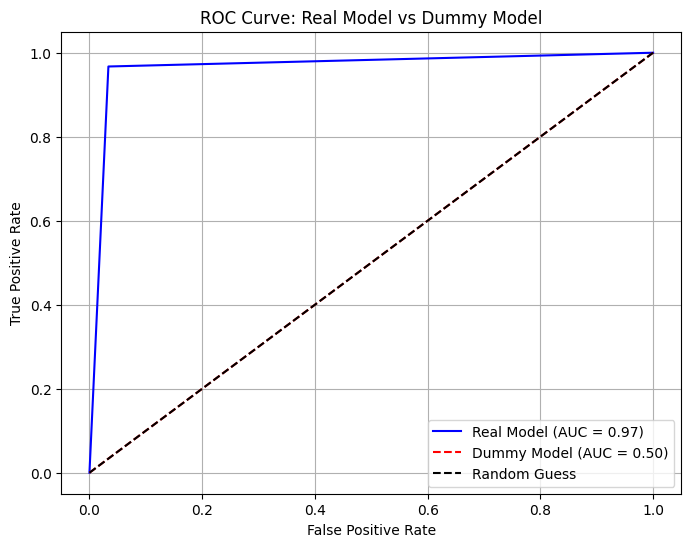

In [87]:
# Plot the roc curve for both
plt.figure(figsize=(8, 6))
plt.plot(real_fpr, real_tpr, label=f"Real Model (AUC = {real_auc:.2f})", color='blue')
plt.plot(dummy_fpr, dummy_tpr, label=f"Dummy Model (AUC = {dummy_auc:.2f})", color='red', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # diagonal line

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Real Model vs Dummy Model")
plt.legend()
plt.grid(True)
plt.show()

In [88]:
print("Dummy Accuracy:", accuracy_score(y_test, dummy_model_pred))
print("Real Model Accuracy:", accuracy_score(y_test, y_pred))

Dummy Accuracy: 0.49377593360995853
Real Model Accuracy: 0.966804979253112


# Hyperparameter Tuning the Model

In [89]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Cross validation total of 5 splits 
cv = StratifiedKFold()
# Hyperparameters for the model, tries all possible combinations with each parameter to get the best possible parameters for the model.
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]
param_grid = [
    # 1. solvers that only work with l2
    {
        'solver': ['newton-cg', 'lbfgs', 'sag'],
        'penalty': ['l2'],
        'C': [100, 10, 1, 0.1, 0.01],
        'class_weight' : class_weight
    },
    
    # 2. liblinear works with l1 and l2
    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'C': [100, 10, 1, 0.1, 0.01],
        'class_weight' : class_weight
    },
    
    # 3. saga supports l1, l2, elasticnet
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'C': [100, 10, 1, 0.1, 0.01],
        'l1_ratio': [0.5],  # only needed for elasticnet
        'class_weight' : class_weight
    }
]

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1) 
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid=[{'C': [100, 10, 1, 0.1, 0.01],
                          'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                           {0: 1, 1: 50}, {0: 1, 1: 100},
                                           {0: 10, 1: 1}, {0: 10, 1: 10},
                                           {0: 10, 1: 50}, {0: 10, 1: 100},
                                           {0: 50, 1: 1}, {0: 50, 1: 10},
                                           {0: 50, 1: 50}, {0: 50, 1: 100},
                                           {0: 100, 1: 1}, {0: 100, 1: 10},
                                           {0...
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'C': [100, 10, 1, 0.1, 0.01],
                          'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                           {0: 1, 1: 50}, {0: 1, 1: 100},
                                           {0: 10, 1: 1}, {0: 10, 1: 10},
                                           {0: 10, 1: 50}, {0: 10, 1: 100},
                                           {0: 50, 1: 1}, {0: 50, 1: 10},
                                           {0: 50, 1: 50}, {0: 50, 1: 100},
                                           {0: 100, 1: 1}, {0: 100, 1: 10},
                                           {0: 100, 1: 50}, {0: 100, 1: 100}],
                          'l1_ratio': [0.5],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['saga']}],
             scoring='accuracy')

In [90]:
# training the model based on the best possible combinations of hyperparameters
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid=[{'C': [100, 10, 1, 0.1, 0.01],
                          'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                           {0: 1, 1: 50}, {0: 1, 1: 100},
                                           {0: 10, 1: 1}, {0: 10, 1: 10},
                                           {0: 10, 1: 50}, {0: 10, 1: 100},
                                           {0: 50, 1: 1}, {0: 50, 1: 10},
                                           {0: 50, 1: 50}, {0: 50, 1: 100},
                                           {0: 100, 1: 1}, {0: 100, 1: 10},
                                           {0...
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'C': [100, 10, 1, 0.1, 0.01],
                          'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                           {0: 1, 1: 50}, {0: 1, 1: 100},
                                           {0: 10, 1: 1}, {0: 10, 1: 10},
                                           {0: 10, 1: 50}, {0: 10, 1: 100},
                                           {0: 50, 1: 1}, {0: 50, 1: 10},
                                           {0: 50, 1: 50}, {0: 50, 1: 100},
                                           {0: 100, 1: 1}, {0: 100, 1: 10},
                                           {0: 100, 1: 50}, {0: 100, 1: 100}],
                          'l1_ratio': [0.5],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['saga']}],
             scoring='accuracy')

In [91]:
print(grid.best_estimator_)
print(f'Best hyperparameters : {grid.best_params_}')
print(f'Best Score : {grid.best_score_}')

LogisticRegression(C=1, class_weight={0: 1, 1: 1}, max_iter=1000, penalty='l1',
                   solver='liblinear')
Best hyperparameters : {'C': 1, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score : 0.991319340329835


In [92]:
# Predict data after hyperparameter tuning
y_pred_grid = grid.predict(X_test)
y_pred_grid

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [93]:
acc_score = accuracy_score(y_test,y_pred_grid)
con_matrix = confusion_matrix(y_test,y_pred_grid)
report = classification_report(y_test,y_pred_grid)
print(f"Accuracy of the model : {acc_score}\n")
print(f"Classification report : \n{report}\n")
print(f"Confusion matrix is given by : \n{con_matrix}")

Accuracy of the model : 0.966804979253112

Classification report : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       119
           1       0.97      0.97      0.97       122

    accuracy                           0.97       241
   macro avg       0.97      0.97      0.97       241
weighted avg       0.97      0.97      0.97       241


Confusion matrix is given by : 
[[115   4]
 [  4 118]]


In [ ]:
# Manually deleting the fN and fP from the test and training data
import numpy as np

# Convert to NumPy arrays if needed
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred)

# Indices of FP and FN
fp_idx = np.where((y_test_array == 0) & (y_pred_array == 1))[0]
fn_idx = np.where((y_test_array == 1) & (y_pred_array == 0))[0]

# Combine all indices to delete
delete_idx = np.concatenate([fp_idx, fn_idx])

In [72]:
X_test_clean = np.delete(X_test, delete_idx, axis=0)  # axis=0 for rows
y_test_clean = np.delete(y_test, delete_idx, axis=0)

In [73]:
X_test = X_test_clean
y_test = y_test_clean

In [74]:
# Predict probabilities for training set
train_probs = model.predict_proba(X_train)[:, 1]
threshold = 0.5
train_preds = (train_probs >= threshold).astype(int)  # Adjust threshold as needed

# Find FP and FN in training data
fp_train_idx = np.where((y_train == 0) & (train_preds == 1))[0]  # FP: Actual 0, Predicted 1
fn_train_idx = np.where((y_train == 1) & (train_preds == 0))[0]  # FN: Actual 1, Predicted 0

# Combine FP and FN indices from training data
train_delete_idx = np.concatenate([fp_train_idx, fn_train_idx])


In [75]:
X_train_clean = np.delete(X_train, train_delete_idx, axis=0)  # axis=0 removes rows
y_train_clean = np.delete(y_train, train_delete_idx, axis=0)


In [76]:
# Reset the index if working with DataFrames
import pandas as pd

X_train_clean_df = pd.DataFrame(X_train_clean)
X_train_clean_df.reset_index(drop=True, inplace=True)

y_train_clean_series = pd.Series(y_train_clean)
y_train_clean_series.reset_index(drop=True, inplace=True)


In [77]:
X_train = X_train_clean_df
y_train = y_train_clean_series

In [95]:
# Pickle the machine learning models, preprocessing model standardscaler
import pickle

pickle.dump(scaler, open('scaler.pkl','wb'))
pickle.dump(grid, open('grid.pkl','wb'))